# Predict the Flat Resale Prices in Singapore
Investing in Flats is the biggest investment for most households in cities like Singapore which is very small but heavily urbanised. Therefore, being able to accurately value the flat prices will not only facilitate market transactions by providing valuable guidance for all market participants (be it home owners, home buyers, landlords, tenants or banks that underwrite mortgages), but also provide useful insights for policy makers and government authorities in understanding the current state of the economy. In this competition, you are expected to create an analytical and modelling framework to predict the flat resale prices based on the quantitative and qualitative features provided in the dataset

## Library Used

In [2]:
import os 
import numpy as np
import pandas as pd 

from sklearn import preprocessing 
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold # 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
        
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBRegressor

import matplotlib.pyplot as plt
#!pip install seaborn
import seaborn as sns

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Read the data

In [20]:
train1   = pd.read_csv("train1.csv",header=0)
train2   = pd.read_csv("train2.csv",header=0)
train3   = pd.read_csv("train3.csv",header=0)
#building = pd.read_csv("building_to_mrt_distance.csv",header=0)
test     = pd.read_csv("test.csv",header=0)

In [21]:
print(train1.shape)
print(train2.shape)
print(train3.shape)

print(test.shape)

(52203, 11)
(37153, 12)
(32578, 12)
(21846, 11)


In [22]:
train1.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'uniqueID'],
      dtype='object')

In [23]:
train2.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'uniqueID'],
      dtype='object')

In [24]:
train1['month_ref'] = train1['month'].str.split('-').str[0]

In [25]:
train1['month_ref'] = train1['month_ref'].astype("int64")

In [26]:
train1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,uniqueID,month_ref
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,100000,2012
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,100001,2012
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,100002,2012
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,100003,2012
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,100004,2012


In [27]:
train1["Max_year_lease"] = 99

In [28]:
train1.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
uniqueID                 int64
month_ref                int64
Max_year_lease           int64
dtype: object

## Calculating remaining lease 

In [29]:
train1["remaining_lease"] = (train1["lease_commence_date"] + train1["Max_year_lease"])- (train1["month_ref"])

In [30]:
train1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,uniqueID,month_ref,Max_year_lease,remaining_lease
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,100000,2012,99,73
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,100001,2012,99,67
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,100002,2012,99,67
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,100003,2012,99,71
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,100004,2012,99,67


In [31]:
train1.drop(["Max_year_lease"],axis=1,inplace=True)
train1.drop(["month_ref"],axis=1,inplace=True)

In [32]:
train1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,uniqueID,remaining_lease
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,100000,73
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,100001,67
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,100002,67
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,100003,71
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,100004,67


In [33]:
print(train1.shape)
print(train2.shape)
print(train3.shape)
print(test.shape)

(52203, 12)
(37153, 12)
(32578, 12)
(21846, 11)


In [34]:
train3.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,uniqueID
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,189356
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,189357
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,189358
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,189359
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,189360


In [35]:
train3['remaining_lease'] = train3['remaining_lease'].str.split(' ').str[0]

In [36]:
train3.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,uniqueID
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0,189356
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0,189357
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0,189358
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62,265000.0,189359
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,265000.0,189360


In [37]:
train1.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
uniqueID                 int64
remaining_lease          int64
dtype: object

In [38]:
train2.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease          int64
resale_price           float64
uniqueID                 int64
dtype: object

In [39]:
train3.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
uniqueID                 int64
dtype: object

In [40]:
train_data = pd.concat([train1,train2,train3])

In [41]:
print(train_data.shape)

(121934, 12)


In [42]:
train_data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,uniqueID,remaining_lease
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,100000,73
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,100001,67
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,100002,67
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,100003,71
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,100004,67


In [43]:
test.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,uniqueID
0,2018-08,ANG MO KIO,2 ROOM,323,ANG MO KIO AVE 3,01 TO 03,44.0,Improved,1977,57 years 10 months,221934
1,2018-08,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,07 TO 09,82.0,New Generation,1977,57 years 11 months,221935
2,2018-08,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1977,57 years 11 months,221936
3,2018-08,ANG MO KIO,3 ROOM,445,ANG MO KIO AVE 10,01 TO 03,67.0,New Generation,1979,60 years 01 month,221937
4,2018-08,ANG MO KIO,3 ROOM,471,ANG MO KIO AVE 10,01 TO 03,67.0,New Generation,1979,59 years 11 months,221938


In [44]:
test['remaining_lease'] = test['remaining_lease'].str.split(' ').str[0]
test["month"] = test["month"].astype("category")

In [45]:
test.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,uniqueID
0,2018-08,ANG MO KIO,2 ROOM,323,ANG MO KIO AVE 3,01 TO 03,44.0,Improved,1977,57,221934
1,2018-08,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,07 TO 09,82.0,New Generation,1977,57,221935
2,2018-08,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1977,57,221936
3,2018-08,ANG MO KIO,3 ROOM,445,ANG MO KIO AVE 10,01 TO 03,67.0,New Generation,1979,60,221937
4,2018-08,ANG MO KIO,3 ROOM,471,ANG MO KIO AVE 10,01 TO 03,67.0,New Generation,1979,59,221938


In [46]:
def Understanding_dataset(data_set):
    print("Number of rows and columns in dataset is  ::",data_set.shape,"\n")
    print("The first 5 rows of dataset is :: \n",data_set.head(),"\n")
    print("List of columns names ::\n", data_set.columns,"\n")
    print("data types of columns::\n", data_set.dtypes ,"\n")
    print("Distribution of numerical columns ::\n" ,data_set.describe(),"\n")
    print("Distribution of categorical columns ::\n" ,data_set.describe(include=['object']))

# Data Visualization

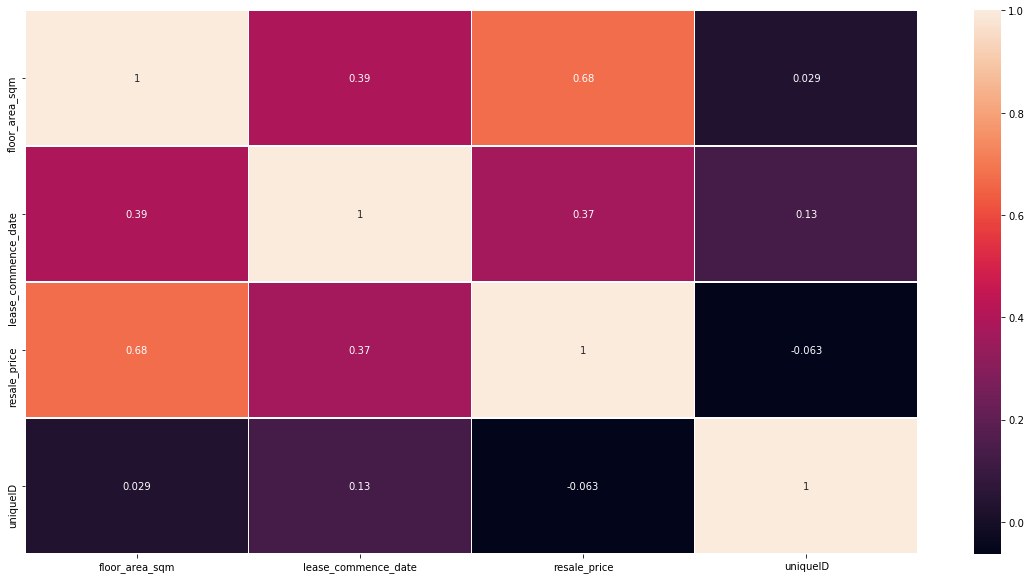

In [47]:
import seaborn as sns
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
corr = train_data.corr()
ax = sns.heatmap(corr, annot=True, linewidths=.5, cbar=True)

In [48]:
# Check distribution of remaining lease
#%matplotlib inline
#sns.distplot(train_data["remaining_lease"] )

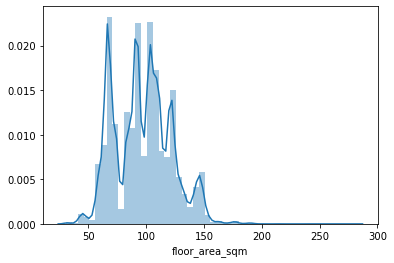

In [49]:
# Check distribution of floor_area_sqm
%matplotlib inline
sns.distplot(train_data["floor_area_sqm"] )

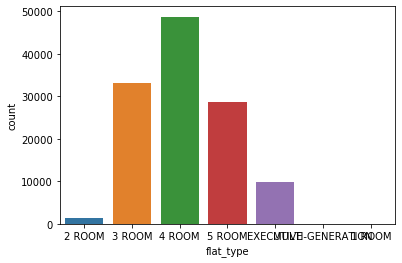

In [50]:
sns.countplot(x='flat_type',data=train_data)
plt.show()

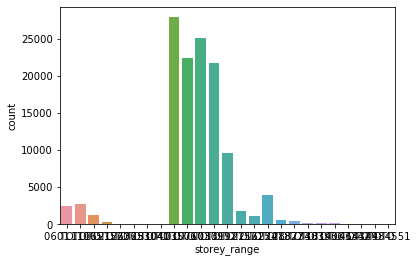

In [51]:
sns.countplot(x='storey_range',data=train_data)
plt.show()

In [53]:
train_data.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
uniqueID               0
remaining_lease        0
dtype: int64

In [54]:
train_data.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
uniqueID                 int64
remaining_lease         object
dtype: object

## Converting Data type

In [55]:
for col in ['block', 'flat_model', 'flat_type', 'storey_range', 'street_name', 'town','month']:
    train_data[col] = train_data[col].astype('category')

In [56]:
for col in ['block', 'flat_model', 'flat_type', 'storey_range', 'street_name', 'town','month']:
    test[col] = test[col].astype('category')

In [57]:
train_data['remaining_lease'] = train_data['remaining_lease'].astype('int64')
test['remaining_lease'] = test['remaining_lease'].astype('int64')

In [58]:
test.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
uniqueID               0
dtype: int64

In [40]:
test.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,uniqueID
0,2018-08,ANG MO KIO,2 ROOM,323,ANG MO KIO AVE 3,01 TO 03,44.0,Improved,1977,57,221934
1,2018-08,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,07 TO 09,82.0,New Generation,1977,57,221935
2,2018-08,ANG MO KIO,3 ROOM,220,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1977,57,221936
3,2018-08,ANG MO KIO,3 ROOM,445,ANG MO KIO AVE 10,01 TO 03,67.0,New Generation,1979,60,221937
4,2018-08,ANG MO KIO,3 ROOM,471,ANG MO KIO AVE 10,01 TO 03,67.0,New Generation,1979,59,221938


In [41]:
train_data.dtypes

block                  category
flat_model             category
flat_type              category
floor_area_sqm          float64
lease_commence_date       int64
month                  category
remaining_lease           int64
resale_price            float64
storey_range           category
street_name            category
town                   category
uniqueID                  int64
dtype: object

In [42]:
test.dtypes

month                  category
town                   category
flat_type              category
block                  category
street_name            category
storey_range           category
floor_area_sqm          float64
flat_model             category
lease_commence_date       int64
remaining_lease           int64
uniqueID                  int64
dtype: object

In [59]:
train_data.drop(["uniqueID"],axis=1,inplace=True)
test.drop(["uniqueID"],axis=1,inplace=True)

In [60]:
cat_attr = list(train_data.select_dtypes("category").columns)
num_attr = list(train_data.columns.difference(cat_attr))

num_attr.remove('resale_price')

print("Categorical columns are::",cat_attr)
print("Numerical columns are::",num_attr)





Categorical columns are:: ['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model']
Numerical columns are:: ['floor_area_sqm', 'lease_commence_date', 'remaining_lease']


## pipeline

In [45]:
train_num_attr = Pipeline(steps=[('scaler', StandardScaler())])

train_cat_attr = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', train_num_attr, num_attr),
        ('cat', train_cat_attr, cat_attr)])

## train and test split

In [46]:
y = train_data["resale_price"]
x = train_data.drop(["resale_price"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

In [47]:
X_train.shape

(85353, 10)

In [48]:
X_test.shape

(36581, 10)

In [49]:
y_train.head()

50294    698000.0
26552    405000.0
23699    370000.0
35902    490000.0
8922     408000.0
Name: resale_price, dtype: float64

In [53]:
X_train.dtypes

block                  category
flat_model             category
flat_type              category
floor_area_sqm          float64
lease_commence_date       int64
month                  category
remaining_lease           int64
storey_range           category
street_name            category
town                   category
dtype: object

# Linear Regression

In [545]:
clf_linreg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regression', LinearRegression())])

In [546]:
clf_linreg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['floor_area_sqm',
                                                   'lease_commence_date',
                                              

In [276]:
X_train.dtypes

block                  category
flat_model             category
flat_type              category
floor_area_sqm          float64
lease_commence_date       int64
month                  category
remaining_lease           int64
storey_range           category
street_name            category
town                   category
dtype: object

In [547]:
y_pred_train = clf_linreg.predict(X_train)
y_pred_test = clf_linreg.predict(X_test)

In [548]:
from sklearn import metrics

print('Train :: Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))  
print('Train :: Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))  
print('Train :: Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

print('Train :: Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))  
print('Train :: Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))  
print('Train :: Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))


Train :: Mean Absolute Error: 24928.252666061486
Train :: Mean Squared Error: 1122637878.1276639
Train :: Root Mean Squared Error: 33505.788725646555
Train :: Mean Absolute Error: 25710.656094438466
Train :: Mean Squared Error: 1203779006.5776966
Train :: Root Mean Squared Error: 34695.51853738025


In [59]:
y_pred_test_test = clf_linreg.predict(test)

NameError: name 'clf_linreg' is not defined

In [60]:
df= pd.read_csv("samplesubmission.csv",header=0)
new_df = pd.DataFrame(list(zip(df['uniqueID'],y_pred_test_test)),columns=['uniqueID','resale_price'])
new_df.to_csv("linear.csv",index=False)

In [82]:
def mean_absolute_percentage_error(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [552]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred_test))

print('MAPE :',mean_absolute_percentage_error(y_train, y_pred_train))

MAPE : 5.874589880214779
MAPE : 5.6930074816847265


# xg boost


In [553]:
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('xgboost',XGBRegressor())])

In [554]:
Xgbm_param_grid = {
    'xgboost__max_depth': [12,18,20], 
    'xgboost__subsample': [0.6,1], 'xgboost__max_features':[0.2, 0.3], 
              'xgboost__n_estimators': [20, 30]}

Xgbm_grid = GridSearchCV(xgb_pipeline, param_grid=Xgbm_param_grid, cv=3)

In [ ]:
Xgbm_grid.fit(X_train,y_train)

[16:28:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:28:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:28:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:28:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:28:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:29:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:29:09] WARNI

In [486]:
preds_test = Xgbm_grid.predict(X_test)

In [487]:
pred_train = Xgbm_grid.predict(X_train)

In [488]:
from sklearn import metrics

print('Train :: Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred_train))  
print('Train :: Mean Squared Error:', metrics.mean_squared_error(y_train, pred_train))  
print('Train :: Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))

print('test :: Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds_test))  
print('test :: Mean Squared Error:', metrics.mean_squared_error(y_test, preds_test))  
print('test :: Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, preds_test)))


print('MAPE test:',mean_absolute_percentage_error(y_test, preds_test))

print('MAPE  train:',mean_absolute_percentage_error(y_train, pred_train))

Train :: Mean Absolute Error: 54237.34467569243
Train :: Mean Squared Error: 5866302834.482595
Train :: Root Mean Squared Error: 76591.79351916624
test :: Mean Absolute Error: 54708.877925357425
test :: Mean Squared Error: 5975825291.846037
test :: Root Mean Squared Error: 77303.46235354556
MAPE test: 11.441161318844365
MAPE  train: 11.398458149503886


In [283]:
Xgbm_grid.best_params_

{'xgboost__max_depth': 18,
 'xgboost__max_features': 0.2,
 'xgboost__n_estimators': 30,
 'xgboost__subsample': 1}

In [ ]:
y_pred_test_test = Xgbm_grid.predict(test)

In [ ]:
new_df = pd.DataFrame(list(zip(df['uniqueID'],y_pred_test_test)),columns=['uniqueID','resale_price'])
new_df.to_csv("xgboost.csv",index=False)

# Decision Tree

In [51]:
from sklearn.tree import DecisionTreeRegressor
clf_dt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', DecisionTreeRegressor())])

dt_param_grid = {'regressor__criterion': ['mse'], 
                 "regressor__min_samples_split": [6,8,10],"regressor__min_samples_leaf": [1, 5]}

dt_grid = GridSearchCV(clf_dt, param_grid=dt_param_grid, cv=5)

dt_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('scaler',
                                                                                          StandardScaler(copy=True,
                                                                                                         with_mean=True,
                        

In [68]:
from sklearn.neighbors import KNeighborsRegressor
clf_dt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', KNeighborsRegressor())])

dt_param_grid = {}

dt_grid = GridSearchCV(clf_dt,dt_param_grid, cv=5)

dt_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('scaler',
                                                                                          StandardScaler(copy=True,
                                                                                                         with_mean=True,
                        

In [69]:
pred_train = dt_grid.predict(X_train)
preds_test = dt_grid.predict(X_test)

In [70]:
from sklearn import metrics
print('Train :: Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred_train))  
print('Train :: Mean Squared Error:', metrics.mean_squared_error(y_train, pred_train))  
print('Train :: Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))

print('test :: Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds_test))  
print('test :: Mean Squared Error:', metrics.mean_squared_error(y_test, preds_test))  
print('test :: Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, preds_test)))


print('MAPE test:',mean_absolute_percentage_error(y_test, preds_test))

print('MAPE  train:',mean_absolute_percentage_error(y_train, pred_train))

Train :: Mean Absolute Error: 18622.80159514018
Train :: Mean Squared Error: 629268212.6488115
Train :: Root Mean Squared Error: 25085.219007391814
test :: Mean Absolute Error: 22994.22416019245
test :: Mean Squared Error: 962075091.3330723
test :: Root Mean Squared Error: 31017.335335793632
MAPE test: 5.252444397882897
MAPE  train: 4.261750650317048


In [71]:
dt_grid.best_params_

{}

In [72]:
y_pred_test_test = dt_grid.predict(test)

In [73]:
new_df = pd.DataFrame(list(zip(df['uniqueID'],y_pred_test_test)),columns=['uniqueID','resale_price'])
new_df.to_csv("knn.csv",index=False)

# Combining Buliding data to train data

In [3]:
building = pd.read_csv("building_to_mrt_distance.csv",header=0)

In [61]:
train_data_new=train_data

In [453]:
train_data1.shape

(121934, 131)

In [454]:
train_data1.dtypes

block                           category
flat_model                      category
flat_type                       category
floor_area_sqm                   float64
lease_commence_date                int64
month                           category
remaining_lease                    int64
resale_price                     float64
storey_range                    category
street_name                     category
town                            category
Building                          object
Jurong East MRT station          float64
Bukit Batok MRT station          float64
Bukit Gombak MRT station         float64
Choa Chu Kang MRT station        float64
Yew Tee MRT station              float64
Kranji MRT station               float64
Marsiling MRT station            float64
Woodlands MRT station            float64
Admiralty MRT station            float64
Sembawang MRT station            float64
Yishun MRT station               float64
Khatib MRT station               float64
Yio Chu Kang MRT

In [5]:
label = building['Building']

In [6]:
building.drop('Building',inplace=True,axis=1)

In [7]:
building.isnull().sum()

Jurong East MRT station        0
Bukit Batok MRT station        0
Bukit Gombak MRT station       0
Choa Chu Kang MRT station      0
Yew Tee MRT station            0
                              ..
Bedok North MRT station        0
Bedok Reservoir MRT station    0
Tampines West MRT station      0
Tampines East MRT station      0
Upper Changi MRT station       0
Length: 119, dtype: int64

In [8]:
standardizer = StandardScaler()

In [9]:
standardizer.fit(building)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
std_x = standardizer.transform(building)
std_building = pd.DataFrame(std_x,columns=building.columns)
std_building.head()

,Jurong East MRT station,Bukit Batok MRT station,Bukit Gombak MRT station,Choa Chu Kang MRT station,Yew Tee MRT station,Kranji MRT station,Marsiling MRT station,Woodlands MRT station,Admiralty MRT station,Sembawang MRT station,...,Bendemeer MRT station,Geylang Bahru MRT Station,Mattar MRT station,Ubi MRT station,Kaki Bukit MRT Station,Bedok North MRT station,Bedok Reservoir MRT station,Tampines West MRT station,Tampines East MRT station,Upper Changi MRT station
0,0.679910,0.631760,0.592454,0.509209,0.446095,0.226445,0.096508,-0.041104,-0.230651,-0.532053,...,-0.180734,-0.333727,-0.468339,-0.539502,-0.592000,-0.580719,-0.566237,-0.616811,-0.645116,-0.568344
1,0.873382,0.823538,0.779955,0.662376,0.590306,0.341414,0.198104,0.048030,-0.158541,-0.504968,...,0.113824,-0.062889,-0.235699,-0.369177,-0.455528,-0.474961,-0.501101,-0.577685,-0.653950,-0.562645
2,0.391404,0.270417,0.165837,-0.084994,-0.236409,-0.696709,-0.912385,-1.124580,-1.407897,-1.833101,...,0.689986,0.575751,0.480091,0.419116,0.360301,0.348321,0.321449,0.253853,0.171377,0.251222
3,0.388920,0.268261,0.164108,-0.084622,-0.235203,-0.692955,-0.907708,-1.119095,-1.401262,-1.823147,...,0.677993,0.564150,0.469217,0.409469,0.351297,0.339908,0.313821,0.246639,0.164976,0.244676
4,0.358974,0.237372,0.132793,-0.113047,-0.263361,-0.718968,-0.932548,-1.142771,-1.422751,-1.830439,...,0.653338,0.543743,0.454183,0.400723,0.345707,0.336472,0.313128,0.247998,0.169643,0.248091


## Cluster the distance metrics dataset and add cluster to main dataset 

In [12]:
from  sklearn.cluster import KMeans

kmean_object = KMeans(n_clusters=2,random_state=3)
kmean_object.fit(std_building)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=3, tol=0.0001, verbose=0)

In [13]:
kmean_object.labels_

array([1, 1, 0, ..., 1, 1, 1])

In [14]:
kmean_object.inertia_

553375.8246817278

In [15]:
from sklearn.metrics import silhouette_samples,silhouette_score
wss={}

In [16]:
for k in range(2,21):
    Kmean_loop= KMeans(n_clusters=k,n_init=30,n_jobs=2,random_state=1000,verbose=0).fit(std_building)
    clusters = Kmean_loop.labels_
    labels = Kmean_loop.predict(std_building)
    #silhouette_score function returns the mean Silhouette Coefficient over all samples. To obtain the values for each sample
    #The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters
    print(silhouette_score(std_building,labels))
    print(k)
    wss[k]=Kmean_loop.inertia_

0.4545638831678907
2
0.4740537298125135
3
0.47532917314988893
4
0.48335348594721833
5
0.4639954133540199
6
0.46647078090478955
7
0.4628972601500294
8
0.4837460553332133
9
0.4991364929634874
10
0.5052151589404938
11
0.5042730555075933
12
0.5071116592004882
13
0.5238590349473946
14
0.5296670776973251
15
0.5441045842265836
16
0.5432360636703549
17
0.5475821727664001
18
0.5451966944571265
19
0.5413060363755415
20


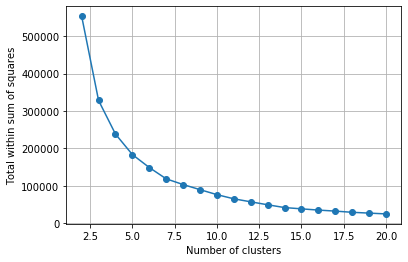

In [17]:
import matplotlib.pyplot as plt
plt.figure()
# %matplotlib notebook
plt.plot(list(wss.keys()),list(wss.values()) ,marker='o')
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Total within sum of squares')
plt.show()

#choose value of K using silhouette_score and graph 

In [18]:
best_kmeans = KMeans(n_clusters=8, random_state=1240)
best_kmeans.fit(std_building)
best_kmeans_labels = best_kmeans.predict(std_building)

In [63]:
kmeans_results =pd.DataFrame({"Building":label,"kmeans_cluster":best_kmeans_labels})
kmeans_results.head()

,Building,kmeans_cluster
0,ANCHORVALE ST BLK 331C,2
1,PUNGGOL WAY BLK 266B,2
2,YISHUN AVE 9 BLK 318A,4
3,YISHUN AVE 9 BLK 318B,4
4,YISHUN AVE 9 BLK 315A,4


In [62]:
train_data_new['Building']=train_data_new['street_name'].astype(str)+" BLK "+train_data_new['block'].astype(str)

## Merge the clusters to Train data set

In [64]:
train_data1 = pd.merge(train_data_new, kmeans_results, on='Building')

In [65]:
train_data1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,Building,kmeans_cluster
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,73,ANG MO KIO AVE 4 BLK 172,7
1,2012-04,ANG MO KIO,3 ROOM,172,ANG MO KIO AVE 4,06 TO 10,60.0,Improved,1986,302500.0,73,ANG MO KIO AVE 4 BLK 172,7
2,2012-05,ANG MO KIO,3 ROOM,172,ANG MO KIO AVE 4,06 TO 10,60.0,Improved,1986,295000.0,73,ANG MO KIO AVE 4 BLK 172,7
3,2012-06,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,04 TO 06,45.0,Improved,1986,259000.0,73,ANG MO KIO AVE 4 BLK 172,7
4,2012-08,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,263000.0,73,ANG MO KIO AVE 4 BLK 172,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121929,2018-07,PUNGGOL,4 ROOM,212A,PUNGGOL WALK,13 TO 15,93.0,Model A,2015,460000.0,95,PUNGGOL WALK BLK 212A,2
121930,2018-07,PUNGGOL,5 ROOM,213A,PUNGGOL WALK,10 TO 12,113.0,Improved,2015,590000.0,95,PUNGGOL WALK BLK 213A,2
121931,2018-07,SENGKANG,4 ROOM,430B,FERNVALE LINK,19 TO 21,92.0,Model A,2015,430000.0,95,FERNVALE LINK BLK 430B,2
121932,2018-07,SENGKANG,4 ROOM,430A,FERNVALE LINK,01 TO 03,92.0,Model A,2015,388000.0,95,FERNVALE LINK BLK 430A,2


In [66]:
train_data1['kmeans_cluster'] = train_data1['kmeans_cluster'].astype('category')

In [68]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121934 entries, 0 to 121933
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   month                121934 non-null  category
 1   town                 121934 non-null  category
 2   flat_type            121934 non-null  category
 3   block                121934 non-null  category
 4   street_name          121934 non-null  category
 5   storey_range         121934 non-null  category
 6   floor_area_sqm       121934 non-null  float64 
 7   flat_model           121934 non-null  category
 8   lease_commence_date  121934 non-null  int64   
 9   resale_price         121934 non-null  float64 
 10  remaining_lease      121934 non-null  int64   
 11  Building             121934 non-null  object  
 12  kmeans_cluster       121934 non-null  category
dtypes: category(8), float64(2), int64(2), object(1)
memory usage: 6.9+ MB


In [89]:
cat_attr1 = list(train_data1.select_dtypes("category").columns)
num_attr1 = list(train_data1.columns.difference(cat_attr1))

num_attr1.remove('resale_price')
num_attr1.remove('Building')


print("Categorical columns are::",cat_attr1)
print("Numerical columns are::",num_attr1)

Categorical columns are:: ['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model', 'kmeans_cluster']
Numerical columns are:: ['floor_area_sqm', 'lease_commence_date', 'remaining_lease']


In [90]:
train_num_attr1 = Pipeline(steps=[('scaler', StandardScaler())])

train_cat_attr1 = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', train_num_attr1, num_attr1),
        ('cat', train_cat_attr1, cat_attr1)])

In [91]:
clf_linreg1 = Pipeline(steps=[('preprocessor', preprocessor1),
                      ('regression', LinearRegression())])

In [92]:
y = train_data1["resale_price"]
x = train_data1.drop(["resale_price"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

In [93]:
clf_linreg1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['floor_area_sqm',
                                                   'lease_commence_date',
                                              

In [94]:
y_pred_train = clf_linreg1.predict(X_train)
y_pred_test = clf_linreg1.predict(X_test)

In [95]:
from sklearn import metrics

print('Train :: Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))  
print('Train :: Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))  
print('Train :: Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

print('test :: Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))  
print('test :: Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))  
print('test :: Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))


print('MAPE test:',mean_absolute_percentage_error(y_test, y_pred_test))

print('MAPE  train:',mean_absolute_percentage_error(y_train, y_pred_train))

Train :: Mean Absolute Error: 24927.498415522576
Train :: Mean Squared Error: 1126090898.9018838
Train :: Root Mean Squared Error: 33557.27788277654
test :: Mean Absolute Error: 25713.90898512722
test :: Mean Squared Error: 1194595820.0789838
test :: Root Mean Squared Error: 34562.925513893984
MAPE test: 5.853323198831333
MAPE  train: 5.695475251591558
